# Demo 3a: 
# Wavefunctions and expectation values

## Introduction

In this iPython notebook, we'll get the probability density function associated to a wavefunction, and we'll calculate some expectation values


# Step 1: let's import some useful modules

In [1]:
%matplotlib inline
import numpy as np #python numerical library
from scipy.integrate import quad #a little function to evaluate some integrals
import matplotlib.pyplot as plt

## Step 2: Let's define some functions we'll need

First we'll write a function that returns a valid wavefunction for the 1D particle in a box.  In the slides you saw the expression for this wavefunction: $$ \psi(x)=\sqrt{\frac{2}{L}}\sin(\frac{2\pi x}{L}) $$  This will be the wavefunction we'll use to evaluate expectation values. 

In [2]:
def wavefunction(x, L):
    '''given x, returns a valid wavefunction for the 1D particle in a box'''
    ##########
    ### Write a single line that assigns to the variable "psi_x"
    ### the expression above evaluated at x 
    ##########
    
    psi_x = np.sqrt(2.0/L)*np.sin(2*np.pi*x / L)
    return psi_x

## Probability density
Next, a function that returns the probability density associated to a wave function.  In class, we saw that  $ \psi^*_n(x)\psi_n(x)$
gave the probability of finding the particle in position $x$

In [3]:
def probabilityDensity(psi_x):
    ''' get probability density function from psi'''
    prob = np.conjugate(psi_x)*psi_x
    return prob

## Expectation value integrand
Finally, a function that returns the product $$\psi(x)^* f(x) \psi(x)$$,
which is what we need to integrate to get an expectation value of the function $f(x)$

In [4]:
def expectation_value_generalized(x, f_x):
    ''' return <x> for the 1D particle in a box
    x is a position array
    and f_x is a FUNCTION that we define below... 
       it can be the position function --> f(x) = x
       or it could be x^2 --> f(x) = x**2
       or it could be whatever you want! it is defined in the next cell
    '''
    psi_x = wavefunction(x, L)
    #########
    ### Write a single line that assigns to the variable "pdf" the product |psi(x)|^2. 
    ### USE THE FUNCTION ABOVE!
    ### Write a single line that assigns to the variable "integrand" the product pdf * f(x)  
    #########
    pdf = probabilityDensity(psi_x)
    integrand = pdf*f_x(x)
    
    return integrand

## Position function
And before we move on, we define a function that given x, returns ... uhhhmmmmmm.... x
I know this seems silly know, but later on, when we want to evaluate the expectation values of more complicated functions, this will be useful!

In [5]:
def f_x_position(x):
    '''the most simple function of x'''
    f_x = x
    return f_x

# Step 3: Plot wavefunctions
Now let's construct the wave function and plot it along with the probability density function associated to it,

In [6]:
L = 5 #length of the box
x = np.arange(0, L, 0.01) #range of x values, from 0 to L in intervals of 0.01

#generate the wave function
psi_x = wavefunction(x,L)
#and the probability density function associated to it
pdf = probabilityDensity(psi_x)

Let's see what the wavefunction and the pdf look like

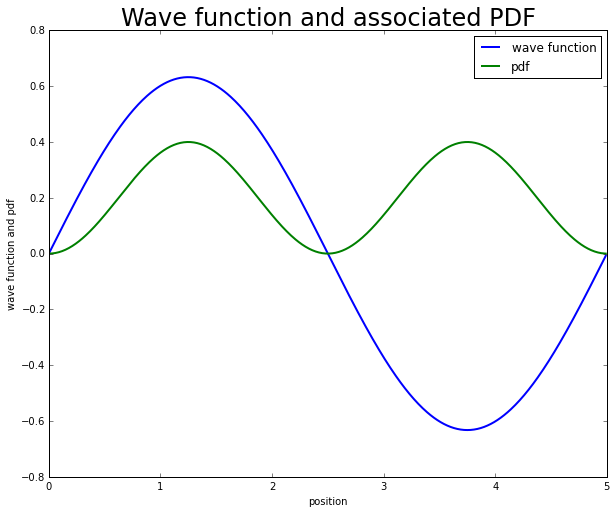

In [7]:
#Plot code, both wave function and probability density
plt.figure(figsize=(10,8))
plt.plot(x, psi_x, linewidth=2)
plt.plot(x, pdf, linewidth=2)
plt.xlabel('position')
plt.ylabel('wave function and pdf')
plt.legend(('wave function','pdf'))
plt.title('Wave function and associated PDF', fontsize=24)
plt.show()

 # Step 4:  And now expectation values
 ##  Let's evaluate the expectation value of the position $x$
 ## <i class="fa fa-question-circle"></i> What do you expect it to be?

In [8]:
#We call the quad function,
# which we imported at the very beginning to perform the integral that we need. 
# the last input (f_x_position)
# is the f_x that is used by expectation_value_generalized
x_expectation = quad(expectation_value_generalized, 0, L, (f_x_position))  
       
print 'The expectation value of x is',x_expectation[0] # and we print out the result

The expectation value of x is 2.5


## Let's calculate the spread
## which is the expectation value of  $\left(x-<x>\right)^2$
### which is the same as saying $\langle \left(x - \frac{L}{2}\right)\rangle$.

First define a function that, given $x$, returns $\left(x - \frac{L}{2}\right)^2$

In [9]:
###Write three lines to define a function called f_x_spread(), which 
### takes as input x, and returns (x - L/2)**2
def f_x_spread(x):
    spread = (x - L/2.0)**2
    return spread

############

##  Evaluate expectation value of $\left(x - \frac{L}{2}\right)^2$


In [10]:
L = 5 #length of the box
x = np.arange(0,5, 0.01)

x_expectation = quad(expectation_value_generalized, 0, L, (f_x_spread))
#x_expectation = quad(expectation_value_spread, 0, L)
print 'The variance of the PDF is -->', x_expectation[0]

The variance of the PDF is --> 1.76670463445
